# Sandpile model simulaition

In [208]:
import numpy as np
import matplotlib.pyplot as plt

class Sandpile:
    def __init__(self, grid_size):
        self.grid_size = grid_size
        self.grid = np.zeros((grid_size, grid_size))
        self.data = []

    def find_high_piles(self):
        x, y = np.where(self.grid > 4)
        return list(zip(x, y))

    def topple(self):
        unstable = True
        num_affected_squares = 0
        while unstable:
            high_piles_coords = self.find_high_piles()
            num_affected_squares += len(high_piles_coords)*4
            for x, y in high_piles_coords:
                self.grid[x, y] -= 5
                if x > 0: self.grid[x-1, y] += 1
                if x < self.grid_size - 1: self.grid[x+1, y] += 1
                if y > 0: self.grid[x, y-1] += 1
                if y < self.grid_size - 1: self.grid[x, y+1] += 1
                        
            if len(self.find_high_piles()) == 0:
                unstable = False
        if num_affected_squares not in [0,4] :
            self.data.append(num_affected_squares)
    
    def add_sand(self, x, y, grains=1):
        self.grid[x, y] += grains
        self.topple()
            

In [209]:
s = Sandpile(5)
for i in range(5):
    s.add_sand(2, 2)
    print(s.grid)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 4. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [210]:
grid_size = 50
num_grains = 500000

sandpile = Sandpile(grid_size)
coordinates = np.random.randint(0, grid_size, size=(num_grains, 2))
#coordinates = [[grid_size//2, grid_size//2] for a in range(num_grains)]
for coord in coordinates:
    sandpile.add_sand(coord[0], coord[1])



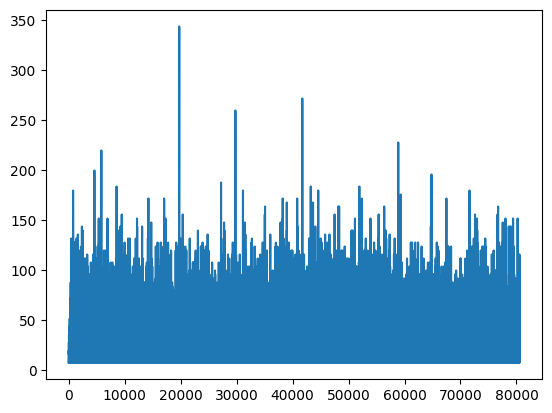

In [211]:
plt.plot(sandpile.data)

In [212]:
isacco = {}
for v in sandpile.data:
    if v not in isacco.keys():
        isacco[v] = 0
    else:
        isacco[v] += 1
print(isacco.keys())

dict_keys([8, 12, 16, 20, 28, 36, 24, 40, 44, 32, 52, 72, 48, 64, 56, 60, 88, 84, 132, 80, 92, 96, 180, 128, 68, 116, 100, 108, 104, 76, 136, 124, 120, 144, 140, 112, 200, 152, 148, 220, 184, 156, 172, 344, 188, 260, 164, 168, 272, 228, 176, 196])


Kolmogorov-Smirnov statistic: 0.2500
p-value: 0.0773


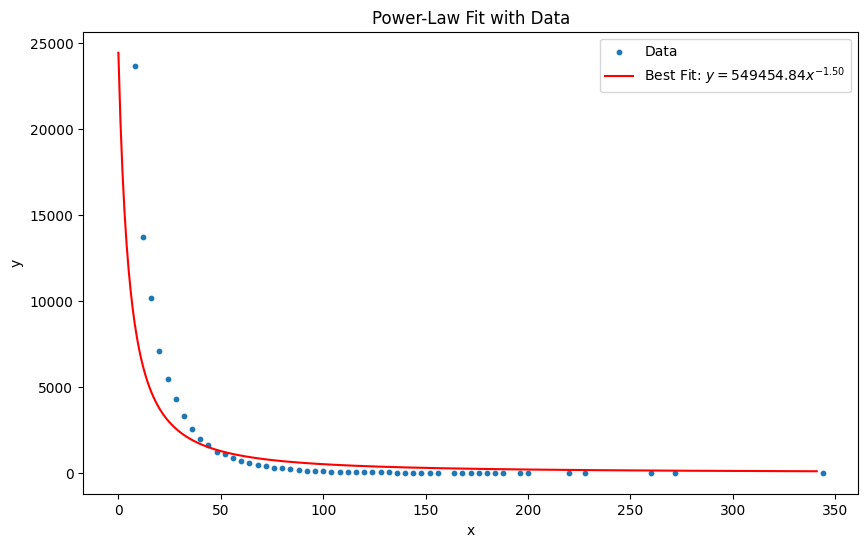

52
52


In [220]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import kstest

# Define the power-law function
def power_law(x, a, b):
    return a * x**(-b)

# Generate example data (replace with your data)
x_data = list(isacco.keys())
y_data = list(isacco.values())
# Fit the power-law model to the data
popt, _ = curve_fit(power_law, x_data, y_data)

# Extract the optimal parameters
a_opt, b_opt = popt

# Normalize the data using the fitted power-law model
y_fit = power_law(x_data, a_opt, b_opt)
y_normalized = y_data / y_fit

y_f_plot = power_law(np.arange(8,350), a_opt, b_opt)

# Perform the KS test comparing the normalized data to the power-law distribution
# For a power-law, compare with a distribution like (x ** (-b_opt))
# Note: The scipy.stats module does not have a direct power-law function, so we use a custom approach
cdf_empirical = np.cumsum(y_normalized / np.sum(y_normalized))
cdf_theoretical = np.cumsum((x_data ** (-b_opt)) / np.sum(x_data ** (-b_opt)))

ks_statistic, p_value = kstest(cdf_empirical, cdf_theoretical)

# Print the results
print(f"Kolmogorov-Smirnov statistic: {ks_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, s=10, label='Data')
plt.plot(y_f_plot, color='red', label=f'Best Fit: $y = {a_opt:.2f}x^{{-{b_opt:.2f}}}$')
plt.xlabel('x')
plt.ylabel('y')
#plt.xscale('log')
#plt.yscale('log')
plt.title('Power-Law Fit with Data')
plt.legend()
plt.show()

print(len(y_data))
print(len(y_fit))


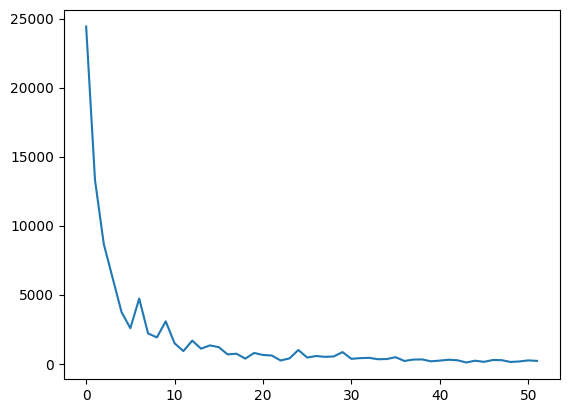

In [217]:
plt.plot(y_fit)


In [ ]:
y_f_plot = power_law(np.arange(8,350), a_opt, b_opt)
